In [26]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import torchvision
from torch.utils.data import Dataset, DataLoader, random_split, Subset
import torchvision.transforms as transforms
from sklearn.model_selection import train_test_split


In [27]:
batch_size = 64

In [35]:
def visualize_images(dataset, class_indices, class_names, num_images=5):
    fig, axs = plt.subplots(len(class_indices), num_images, figsize=(12, 8))
    axs = axs.flatten()
    
    displayed_images = {cls: 0 for cls in class_indices}
    
    for img, label in dataset:
        if displayed_images[label] < num_images and label in class_indices:
            idx = class_indices.index(label) * num_images + displayed_images[label]
            axs[idx].imshow(img.permute(1, 2, 0).numpy()) 
            axs[idx].set_title(class_names[label])
            axs[idx].axis('off')
            displayed_images[label] += 1
        
        if all(count >= num_images for count in displayed_images.values()):
            break
    
    plt.tight_layout()
    plt.show()


In [28]:
dataset = torchvision.datasets.CIFAR10(root="./data", train=True, download=True, transform=transforms.ToTensor())
testset = torchvision.datasets.CIFAR10(root="./data", train=False, download=True, transform=transforms.ToTensor())

Files already downloaded and verified
Files already downloaded and verified


In [29]:
selected_classes = [0, 1, 2]

def filter_classes(dataset, selected_classes):
    indices = [i for i, (_, label) in enumerate(dataset) if label in selected_classes]
    return Subset(dataset, indices)

filtered_train = filter_classes(dataset, selected_classes)
filtered_test = filter_classes(testset, selected_classes)

filtered_train

In [30]:
filtered_train_labels = [filtered_train[i][1] for i in range(len(filtered_train))]

train_indices, val_indices = train_test_split(
    list(range(len(filtered_train))),
    test_size=0.2,
    stratify=filtered_train_labels,
    random_state=42
)

# Create subsets
train_dataset = Subset(filtered_train, train_indices)
val_dataset = Subset(filtered_train, val_indices)
test_dataset = filtered_test

1st part

In [31]:
train = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
validate = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)
testLoader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print(f"Train size: {len(train_dataset)}")
print(f"Validation size: {len(val_dataset)}")
print(f"Test size: {len(test_dataset)}")

Train size: 12000
Validation size: 3000
Test size: 3000


2nd part

Training Dataset Visualization:


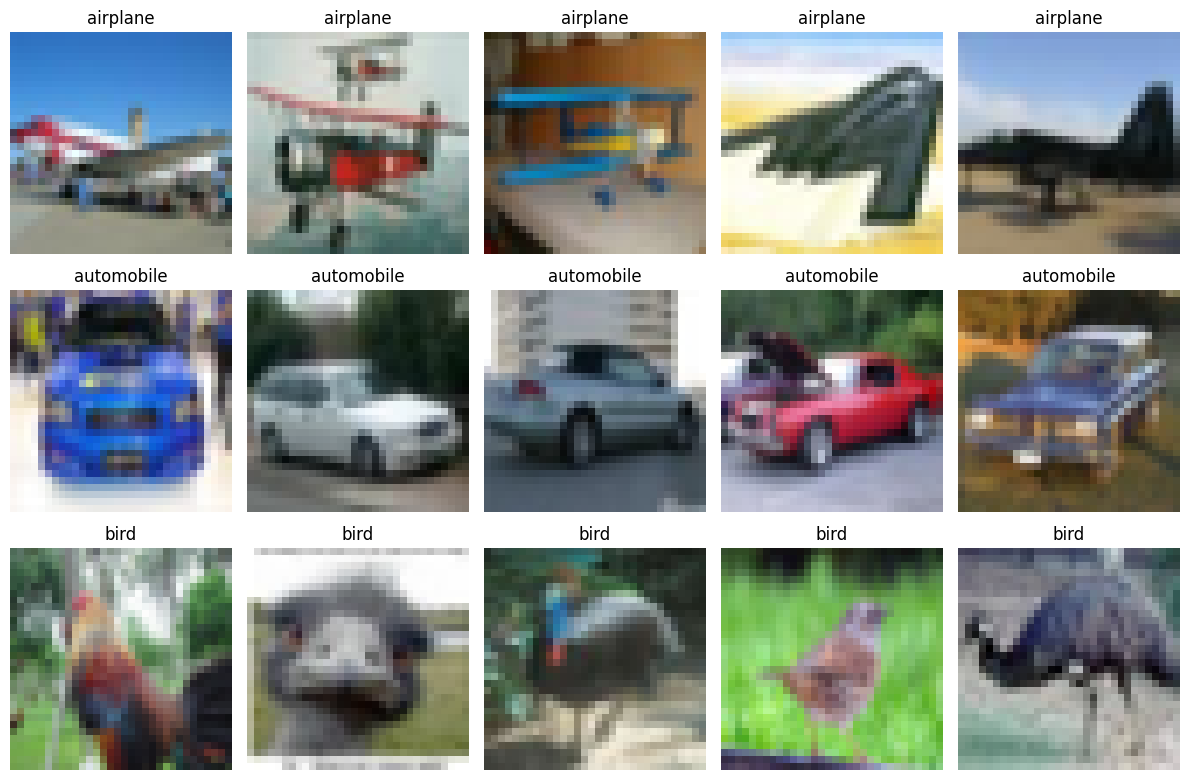

In [36]:
class_names = ['airplane', 'automobile', 'bird']
print("Training Dataset Visualization:")
visualize_images(train_dataset, class_indices=selected_classes, class_names=class_names, num_images=5)


Validation Dataset Visualization:


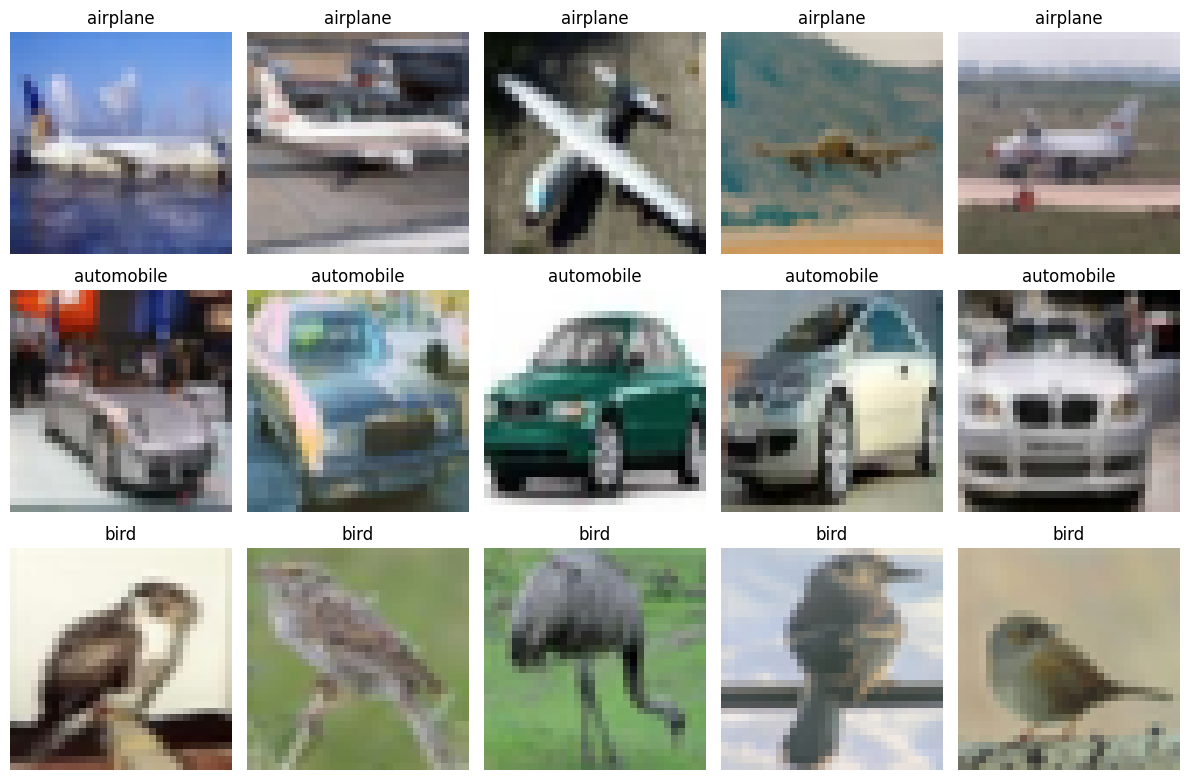

In [37]:
print("Validation Dataset Visualization:")
visualize_images(val_dataset, class_indices=selected_classes, class_names=class_names, num_images=5)

3rd part

In [38]:
class CustomCNN(nn.Module):
    def __init__(self, num_classes=3):
        super(CustomCNN, self).__init__()
#first layer
        self.conv1 = nn.Conv2d(
            in_channels=3, out_channels=16,
            kernel_size=5, stride=1, padding=1
        )
        self.pool1 = nn.MaxPool2d(kernel_size=3, stride=2)

#second layer
        self.conv2 = nn.Conv2d(
            in_channels=16, out_channels=32,
            kernel_size=3, stride=1, padding=0
        )
        self.pool2 = nn.MaxPool2d(kernel_size=3, stride=3)

        self.fc1 = nn.Linear(32 * 2 * 2, 16)  
        self.fc2 = nn.Linear(16, num_classes)

#activation
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.pool1(x)

        x = self.relu(self.conv2(x))
        x = self.pool2(x)

        x = x.view(x.size(0), -1)

        x = self.relu(self.fc1(x))
        x = self.fc2(x)

        return x
